# ANN Intro

This NB is constructed such that it also runs in reasonable time on Laptop CPUs (e.g. an i3)

## Local Setup

There are different options to set up the TensorFlow library (which now includes [Keras](https://keras.io) as backend library) on your own computer. The simplest of them is using only the CPU and can be installed in 1 command via [`conda`](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/), in an anaconda shell run:

```
conda install tensorflow
```

**NOTE**: TF migth not be compatible with your current environment, so here we create a [new environment](https://conda.io/docs/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands) first:

```
conda create -n tf tensorflow
conda activate tf
```

In that case you need to install jupyter, scikit-learn, matplotlib, numpy and pandas in that environment again, with e.g.:

```
conda install jupyter scikit-learn matplotlib numpy pandas
```

(If you have a [supported Nvidia graphics card](https://developer.nvidia.com/cuda-gpus) in your machine and would like to use it for accelerated network training, make sure to follow [this guide](https://www.tensorflow.org/install/gpu) to install required packages and finally use the `tensorflow-gpu` library.)

The usage of the TensorFlow library in Python will be the same for CPU and GPU.

In [1]:
## fetch MNIST dataset (as done in last NB)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1) # ('MNIST original')
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
## Scale the input data into the range [0, 1]
X,y = mnist["data"]/255, mnist["target"]

from sklearn.model_selection import train_test_split
## use sklearn's train_test_split to split the data into 
## 50000 instances for training (X_train, y_train)
## 10000 for validation (X_val, y_val)
## and 10000 for testing (X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, shuffle=False)

In [3]:
## load an MLP classifier from sklearn with all its defaults, only specifying `random_state=42`
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42)

## try printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print("Hidden neurons: ",clf.hidden_layer_sizes)
#print(clf.n_layers_) Nicht möglich, da Standardmäßig vor fit() nicht verfügbar
#print(clf.n_outputs_) Nicht möglich, da Standardmäßig vor fit() nicht verfügbar

## train the MLP with the train set, time its execution
%time clf.fit(X_train, y_train)

## try again printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print("Hidden neurons: ",clf.hidden_layer_sizes)
print("Number of Layers: %f" %clf.n_layers_)
print("Number of Outputneurons: %f" %clf.n_outputs_)

Hidden neurons:  (100,)
CPU times: user 1min 31s, sys: 1min 56s, total: 3min 27s
Wall time: 26.1 s
Hidden neurons:  (100,)
Number of Layers: 3.000000
Number of Outputneurons: 10.000000


In [4]:
## print the scores of the trained MLP on the train and on the test set:
print("Training set score: %f" %clf.score(X_train, y_train))
print("Test set score: %f" %clf.score(X_test, y_test))

clf.get_params()

Training set score: 1.000000
Test set score: 0.978400


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Questions 1

1. What are the default values assumed for the MLPClassifier of sklearn?
2. What MLP ist constructed with the defaults? \
   I.e. how many hidden layers and how many input, hidden and output neurons/units does the MLP have?

### Answers

1. Siehe Ausgabe oben von clf.get_params(), ausser random_state=none
2. Hidden Layers: 1 ; Input neurons: 784 ; Hidden neurons: 100 ; Output neurons: 10

In [5]:
## Now construct another MLP classifier as above but with 2 hidden layers of 100 and 50 neurons/units.
## In addition it should used mini-batch gradient descent (mBGD) with a mini-batch size of 100
## and train only for 100 epochs.
## Read the docs carefully to figure out what you need to specify!
#clf_2 = MLPClassifier(hidden_layer_sizes=(100,50), random_state=42, batch_size=min(100, 100))

#Für letztes Exercise
clf_2 = MLPClassifier(hidden_layer_sizes=(100,100), random_state=42, batch_size=min(100, 100))

## try printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print("Hidden neurons: ",clf_2.hidden_layer_sizes)
#print("Number of Layers: %f" %clf_2.n_layers_) Nicht möglich, da Standardmäßig vor fit() nicht verfügbar
#print("Number of Outputneurons: %f" %clf_2.n_outputs_) Nicht möglich, da Standardmäßig vor() fit nicht verfügbar

## train the MLP with the train set, time its execution
%time clf_2.fit(X_train, y_train)

## try again printing out the sizes of the hidden layers, the number of layers and the number of output neurons/units
print("Hidden neurons: ",clf_2.hidden_layer_sizes)
print("Number of Layers: %f" %clf_2.n_layers_)
print("Number of Outputneurons: %f" %clf_2.n_outputs_)

Hidden neurons:  (100, 100)
CPU times: user 1min 16s, sys: 1min 42s, total: 2min 58s
Wall time: 22.5 s
Hidden neurons:  (100, 100)
Number of Layers: 4.000000
Number of Outputneurons: 10.000000


In [6]:
## print the scores of the trained MLP on the train and on the test set:
print("Training set score: %f" %clf_2.score(X_train, y_train))
print("Test set score: %f" %clf_2.score(X_test, y_test))

Training set score: 0.999740
Test set score: 0.981400


In [7]:
def n_params(model): # from: https://stackoverflow.com/questions/59078110/way-to-count-the-number-of-parameters-in-a-scikit-learn-model
    """Return total number of parameters in a 
    Scikit-Learn model.

    This works for the following model types:
     - sklearn.neural_network.MLPClassifier
     - sklearn.neural_network.MLPRegressor
     - sklearn.linear_model.LinearRegression
     - and maybe some others
    """
    return (sum([a.size for a in model.coefs_]) +  
            sum([a.size for a in model.intercepts_]))

## use the given function to get the number of model parameters of the last MLP
n_params(clf_2)

89610

### Questions 2

1. Does the returned number of parameters match your expectations? Write down your own calculation!


### Answers

1. (784+1)100 + (100+1)50 + (50+1)10 = 84060

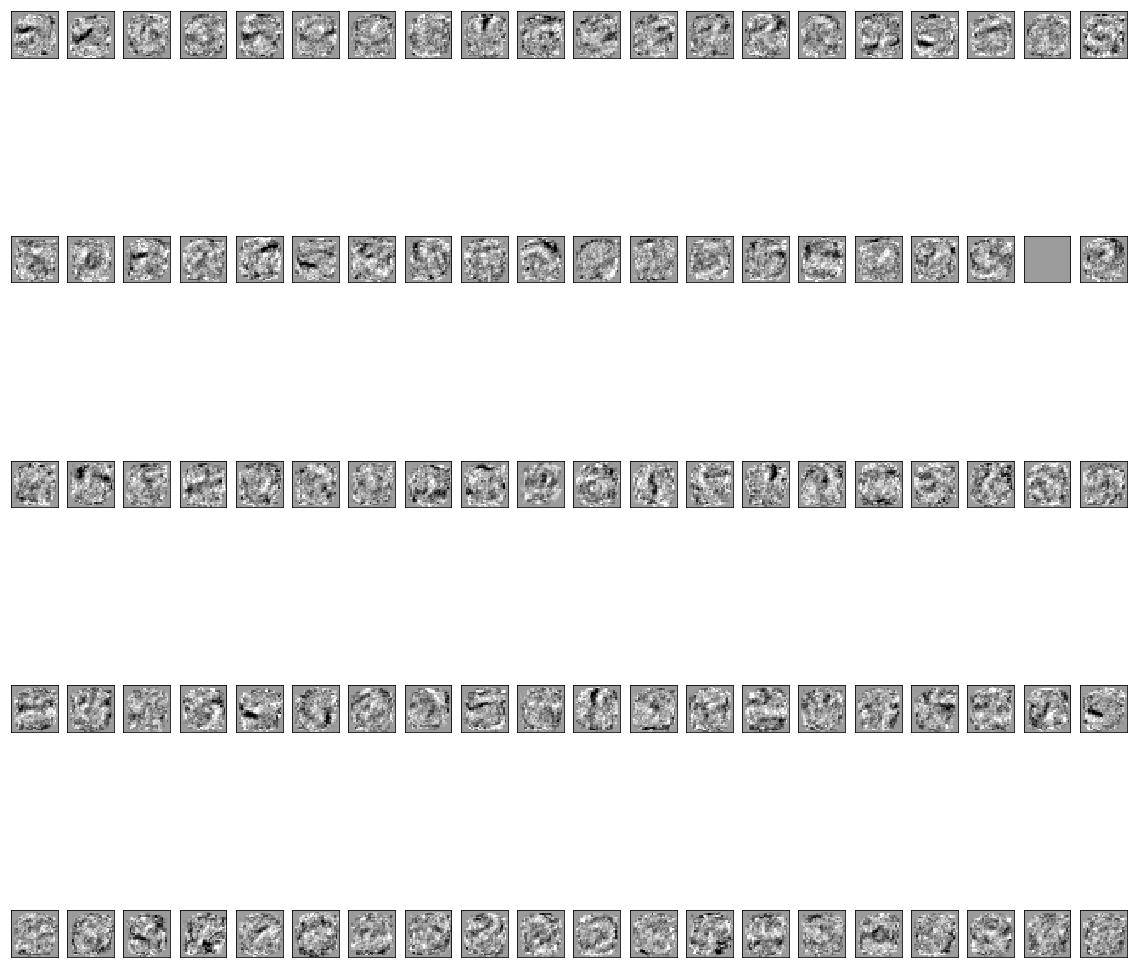

In [8]:
## Now use the example from: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html
## to plot ALL weight matrices of the first layer of the MLP trained above
## using subplots with 20 columns.
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 20,figsize=(20,20))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf_2.coefs_[0].min(), clf_2.coefs_[0].max()
for coef, ax in zip(clf_2.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Now it's time to test your TensorFlow installation by importing the package. The following code cell should execute without errors:

In [9]:
import tensorflow as tf

Now let's check which computing devices TensorFlow has found on this machine. If you don't have the GPU setup on your computer, the list should just contain one CPU: `/device:CPU:0` 

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5520634918048746720
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6536530035496215958
physical_device_desc: "device: XLA_CPU device"
]


The cell below creates a similar MLP as above using tf.keras, see also this [tutorial network](https://github.com/keras-team/keras/blob/fcc0bfa354c5a47625d681d0297a66ef9ff43a9e/examples/mnist_mlp.py) which also uses the MNIST dataset.

Keras has a nice method `model.summary()` that prints a tabular overview of your network architecture, together with the input/output dimensions and number of parameters for each layer.

In [11]:
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 100
num_classes = 10
epochs = 100

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense( 50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_c))

2.3.0
2.4.0
50000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
500/500 [==============================] - 0s 956us/step - loss: 0.3645 - accuracy: 0.8983 - val_loss: 0.1920 - val_accuracy: 0.9447
Epoch 2/100
500/500 [==============================] - 0s 769us/step - loss: 0.1619 - accuracy: 0.9523 - val_loss: 0.1286 - val_accuracy: 0.9610
Epoch 3/100
500/500 [====================

500/500 [==============================] - 0s 723us/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.1612 - val_accuracy: 0.9762
Epoch 52/100
500/500 [==============================] - 0s 732us/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.1445 - val_accuracy: 0.9760
Epoch 53/100
500/500 [==============================] - 0s 726us/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1312 - val_accuracy: 0.9796
Epoch 54/100
500/500 [==============================] - 0s 733us/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.1356 - val_accuracy: 0.9778
Epoch 55/100
500/500 [==============================] - 0s 740us/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1343 - val_accuracy: 0.9794
Epoch 56/100
500/500 [==============================] - 0s 743us/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.1352 - val_accuracy: 0.9765
Epoch 57/100
500/500 [==============================] - 0s 736us/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1508 - val_accuracy

In [12]:
score = model.evaluate(X_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16398583352565765
Test accuracy: 0.9803000092506409


You should see the training going through the epochs and in the end the trained network is evaluated on the test set. 
It shoud reache at least a classification accurary of 97%.

### Exercise

Now try to tune the hyper-parameters of the MLP to achieve more than 98% accuracy.\
List the parameters you changed to achieve this score.

**Antwort:**

hidden_layer_size_: (100,100)\
Test_score: 98.14%\
Test_accuracy (TensorFlow): 98.03%

clf_2 = MLPClassifier(hidden_layer_sizes=(100,100), random_state=42, batch_size=min(100, 100))

Bemerkungen:
1. Änderung der *batch_size* hat keine Änderung des score ergeben.
3. Ein 3. hidden_layer bringt keine Verbesserung